# Project 2 Part 5

Support and References:

Students are encouraged to consult the official documentation of NLTK, SpaCy, wordcloud, and Scikit-Learn, as well as the Learn Platform.

In [43]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.probability import FreqDist
from wordcloud import WordCloud
pd.set_option('display.max_colwidth', None)

## 1) Data Preprocessing

### Load and inspect the dataset.

How many reviews?
What does the distribution of ratings look like?
Any null values?

Use the rating column to create a new target column with two groups: high-rating and low-rating groups.

We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.
Utilize NLTK and SpaCy for basic text processing, including:

removing stopwords

tokenization

lemmatization

Tips:

Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
You will want to create several versions of the data, lemmatized, tokenized, lemmatized joined back to one string per review, and tokenized joined back to one string per review. This will be useful for different analysis and modeling techniques.

​Note: you may find some artifacts during your EDA e.g. HTML code like "href". You are allowed to drop rows from your dataset after identifying problematic trends in some of the texts.  (Hint: remember df[col].str.contains)
Save your processed data frame in a joblib file saved in the "Data-NLP/" folder for future modeling.

In [2]:
# load dataset
df = pd.read_csv('Data-NLP/movie_reviews_v2.csv')

# preview dataset
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0


In [3]:
# how many reviews?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB


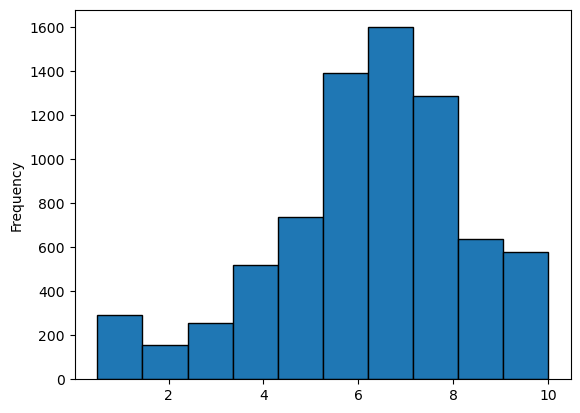

In [4]:
# what does the distribution of ratings look like?
df['rating'].plot(kind='hist', edgecolor='black');

In [5]:
# any null values?
df.isna().sum()

review_id            0
movie_id             0
imdb_id              0
original_title       0
review               0
rating            1196
dtype: int64

In [6]:
# Use the rating column to create a new target column with two groups: high-rating (>=9) and low-rating groups (<=4)

hl_rating = []

for rating in df['rating']:
    if rating >= 9.0:
        hl_rating.append('high')
    elif rating <= 4.0:
        hl_rating.append('low')
    else:
        hl_rating.append('med')
        
df['high_low'] = hl_rating

In [7]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med


## 2) EDA and Visualization

### Create word clouds to visualize the most frequent and significant words in each group.

Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)

Save your wordclouds as .png files in the "Images/" folder in your repo.

In [8]:
# convert all words to lower
df['review_lowercase'] = df['review'].str.lower()

#### Create Tokens

In [9]:
# create tokens
df['tokens'] = df['review_lowercase'].str.split()

In [10]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as..."
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ..."
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'..."
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid..."


#### Create Lemmas

In [11]:
# load spacy model with parser and ner disabled
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# verify parser and ner not loaded
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [12]:
# [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

In [13]:
## process the text using the spacy function
df['spacy_lemmas'] = df['review'].apply(spacy_process)

In [14]:
# Join list of lemmas into a string with spaces between each lemma
df['lemmas_joined'] = df['spacy_lemmas'].map(lambda x: " ".join(x))

In [15]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tell story peop...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...","[roommate, hate, stop, motion, animation, watc...",roommate hate stop motion animation watch 2018...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review pun go crack ...


In [16]:
# create respective filters for high and low ratings
filter_high = df['high_low'] =='high'
filter_low = df['high_low'] == 'low'

In [17]:
# Make a single giant string with entire group of >=9.0 ratings
high_lemmas_joined= " ".join(df.loc[filter_high, 'lemmas_joined'])
# Make a single giant string with entire group of <=4.0 ratings
low_lemmas_joined= " ".join(df.loc[filter_low, 'lemmas_joined'])

In [18]:
# preview df
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tell story peop...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...","[roommate, hate, stop, motion, animation, watc...",roommate hate stop motion animation watch 2018...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review pun go crack ...


#### Create Wordclouds

In [19]:
# define custom stopwords
from wordcloud import STOPWORDS
custom_stopwords = ['film','movie','character','bad','good', 'story', 'time', 'go', 'watch', 'think', 'know', 'feel','way','come','work', *STOPWORDS]

In [20]:
# create 2 wordclouds: high and low

high_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                       stopwords=custom_stopwords
                     ).generate(high_lemmas_joined)
low_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      stopwords=custom_stopwords
                      ).generate(low_lemmas_joined)

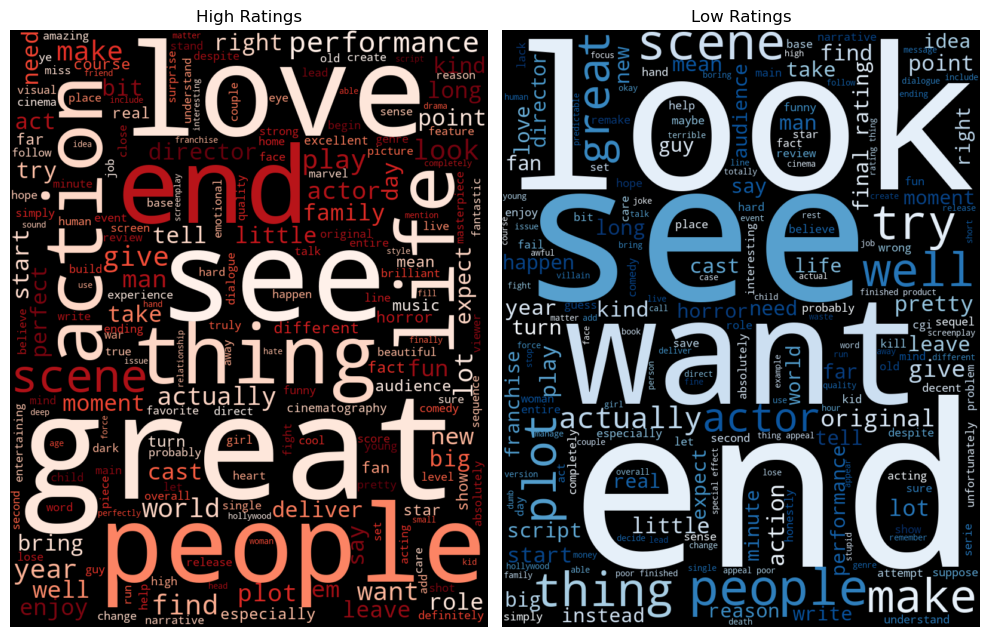

In [21]:
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(high_cloud, interpolation='bilinear')
axes[0].set_title("High Ratings")
axes[1].imshow(low_cloud, interpolation='bilinear')
axes[1].set_title("Low Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();

In [55]:
# save wordclouds to images folder
fig.savefig('Data-NLP/Images/wordclouds.png', dpi=300, bbox_inches='tight', transparent=False)                                                   

### Apply nltk's FreqDist class to compare the frequency distribution of words in the review groups.

Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)

Save your freq dist plots as .png files in the "Images/" folder in your repo.



In [22]:
# split df into high and low

df_high = df[df['high_low']=='high']
df_low = df[df['high_low']=='low']
df_high.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,high,"okay, i will admit i can be a bit of an easy g...","[okay,, i, will, admit, i, can, be, a, bit, of...","[okay, admit, bit, easy, grader, come, romanti...",okay admit bit easy grader come romantic comed...
21,5570c897c3a368709c000bca,2787,tt0134847,Pitch Black,All you people are so scared of me. Most days ...,9.0,high,all you people are so scared of me. most days ...,"[all, you, people, are, so, scared, of, me., m...","[people, scared, day, compliment, be, got, to,...",people scared day compliment be got to worry p...
22,5b92026d0e0a26609c005caa,2787,tt0134847,Pitch Black,One of those few movies that most people don't...,9.0,high,one of those few movies that most people don't...,"[one, of, those, few, movies, that, most, peop...","[movie, people, care, personally, think, crimi...",movie people care personally think criminally ...
24,5f98ecffae36680036bc7170,2787,tt0134847,Pitch Black,The movie that put Vin Diesel on the map as Ri...,9.0,high,the movie that put vin diesel on the map as ri...,"[the, movie, that, put, vin, diesel, on, the, ...","[movie, vin, diesel, map, riddick, crooked, an...",movie vin diesel map riddick crooked anti hero...


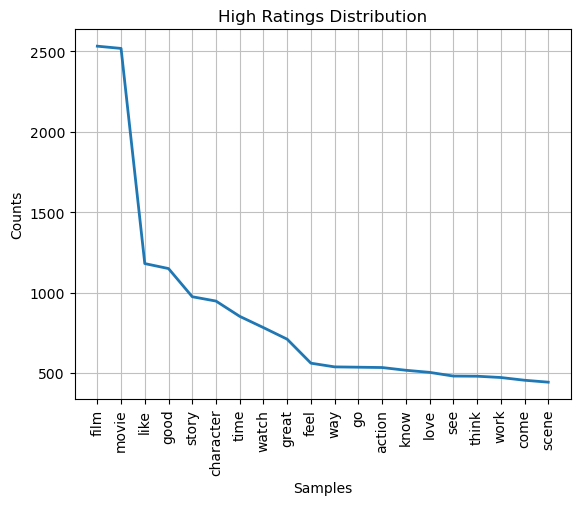

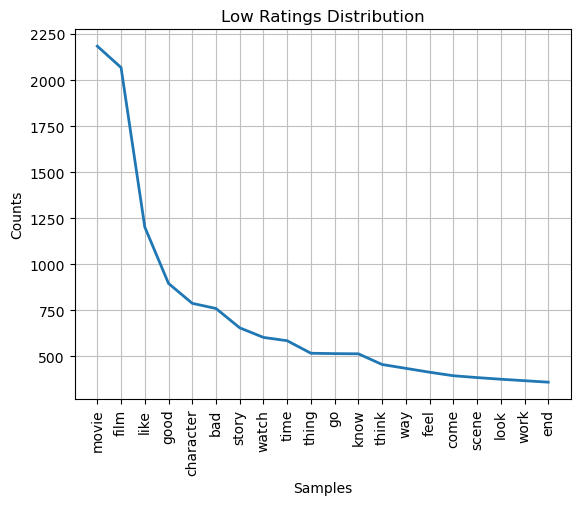

<Figure size 640x480 with 0 Axes>

In [58]:
high_lemmas = df_high['spacy_lemmas'].explode().to_list()
low_lemmas = df_low['spacy_lemmas'].explode().to_list()

high_dist = FreqDist(high_lemmas)
low_dist = FreqDist(low_lemmas)

# plot high freqdist
high_dist.plot(20, title = 'High Ratings Distribution');

# save high freqdist
plt.savefig('Data-NLP/Images/freqdist-high.png', dpi=300, bbox_inches='tight', transparent=False);

# plot low freqdist
low_dist.plot(20, title = 'Low Ratings Distribution');

# save low freqdist
plt.savefig('Data-NLP/Images/freqdist-low.png', dpi=300, bbox_inches='tight', transparent=False);

### Perform n-grams analysis (bigrams and trigrams)

Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)

Focus on bigrams or trigrams, using NLTK's BigramCollocationFinder and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.

Describe any differences. What do these differences tell you?

Save your data frame comparison of the top ngrams for each group as a Markdown table.
    
    You can use the df.to_markdown() method to create a string version of your data frame that can be copied and pasted into a Markdown cell and your README.

In [24]:
# Obtain single list of tokens from all high reviews
high_reviews_tokens_exploded_list = df.loc[filter_high, 'spacy_lemmas'].explode().astype(str).to_list()
high_reviews_tokens_exploded_list[:5]

['guilty', 'pleasure', 'personally', 'love', 'great']

In [25]:
# Obtain single list of tokens from all low reviews
low_reviews_tokens_exploded_list = df.loc[filter_low, 'spacy_lemmas'].explode().astype(str).to_list()
low_reviews_tokens_exploded_list[:5]

['underwhelme', 'straight', 'bore', 'course', 'see']

In [26]:
import nltk

# Instantiate a measures objects for Bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [27]:
# Create a finder for the high reviews
bigram_finder_high = nltk.BigramCollocationFinder.from_words(high_reviews_tokens_exploded_list)

In [28]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
bigrams_scores_high = bigram_finder_high.score_ngrams(bigram_measures.raw_freq)
bigrams_scores_high[:10]

[(('feel', 'like'), 0.0008090846603276435),
 (('good', 'movie'), 0.0007016840417000802),
 (('watch', 'movie'), 0.0006444037117653798),
 (('good', 'film'), 0.0005226830106541413),
 (('comic', 'book'), 0.0004940428456867912),
 (('action', 'movie'), 0.0004582426394776034),
 (('movie', 'like'), 0.0004582426394776034),
 (('special', 'effect'), 0.00042244243326841564),
 (('like', 'movie'), 0.0004081223507847405),
 (('main', 'character'), 0.0004081223507847405)]

In [29]:
# Create a finder for the low reviews
bigram_finder_low = nltk.BigramCollocationFinder.from_words(low_reviews_tokens_exploded_list)

# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
bigrams_scores_low = bigram_finder_low.score_ngrams(bigram_measures.raw_freq)
bigrams_scores_low[:10]

[(('feel', 'like'), 0.001182272963887737),
 (('final', 'rating'), 0.0011293353684897786),
 (('rating', '★'), 0.0011293353684897786),
 (('★', '★'), 0.0010322831102601883),
 (('finished', 'product'), 0.000847001526367334),
 (('look', 'like'), 0.000847001526367334),
 (('appeal', 'poor'), 0.0008381785938010076),
 (('poor', 'finished'), 0.0008381785938010076),
 (('thing', 'appeal'), 0.0008381785938010076),
 (('★', 'thing'), 0.0008381785938010076)]

In [30]:
# Convert list of tuples to dataframe for high
df_bigram_scores_high = pd.DataFrame(bigrams_scores_high, columns=['Words','Frequency'])
df_bigram_scores_high.head()

,Words,Frequency
0,"(feel, like)",0.000809
1,"(good, movie)",0.000702
2,"(watch, movie)",0.000644
3,"(good, film)",0.000523
4,"(comic, book)",0.000494


In [31]:
# Convert list of tuples to dataframe for low
df_bigram_scores_low = pd.DataFrame(bigrams_scores_low, columns=['Words','Frequency'])
df_bigram_scores_low.head()

,Words,Frequency
0,"(feel, like)",0.001182
1,"(final, rating)",0.001129
2,"(rating, ★)",0.001129
3,"(★, ★)",0.001032
4,"(finished, product)",0.000847


In [32]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)

High Rating Reviews             Low Rating Reviews          
                Words Frequency                Words Frequency
0        (feel, like)  0.000809         (feel, like)  0.001182
1       (good, movie)  0.000702      (final, rating)  0.001129
2      (watch, movie)  0.000644          (rating, ★)  0.001129
3        (good, film)  0.000523               (★, ★)  0.001032
4       (comic, book)  0.000494  (finished, product)  0.000847
5     (action, movie)  0.000458         (look, like)  0.000847
6       (movie, like)  0.000458       (appeal, poor)  0.000838
7   (special, effect)  0.000422     (poor, finished)  0.000838
8       (like, movie)  0.000408      (thing, appeal)  0.000838
9   (main, character)  0.000408           (★, thing)  0.000838

In [33]:
def get_ngram_measures_finder(tokens, ngrams=2, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams

In [34]:
get_ngram_measures_finder(high_reviews_tokens_exploded_list, ngrams=3, top_n=20)

,Words,Raw Freq
0,"(spoiler, free, review)",0.000229
1,"(=, =, =)",0.000200
2,"(review, <, >)",0.000193
3,"(★, ★, ★)",0.000172
4,"(enjoy, read, spoiler)",0.000165
5,"(free, review, follow)",0.000165
6,"(read, spoiler, free)",0.000165
7,"(review, follow, blog)",0.000165
8,"(⭐, ⭐, ⭐)",0.000143
9,"(comic, book, movie)",0.000129


In [35]:
get_ngram_measures_finder(low_reviews_tokens_exploded_list, ngrams=3, top_n=20)

,Words,Raw Freq
0,"(final, rating, ★)",0.001129
1,"(rating, ★, ★)",0.001015
2,"(appeal, poor, finished)",0.000838
3,"(poor, finished, product)",0.000838
4,"(thing, appeal, poor)",0.000838
5,"(★, thing, appeal)",0.000838
6,"(★, ★, thing)",0.000838
7,"(boring, disappointing, avoid)",0.000512
8,"(disappointing, avoid, possible)",0.000512
9,"(½, boring, disappointing)",0.000512


### Differences in N-grams Analysis:

- Higher reviews had more mentions of franchises (Marvel, Star Wars) and super hero or comic book movies
- Lower reviews mentioned 'boring' and 'disappointing'
- Both mentioned spoiler free reviews

### Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

Compare the sentiments of high-rating and low-rating texts.

higher for high-rating reviews, lower for low-rating reviews

Compare the compound sentiment scores for high and low-rating reviews.

higher for high-rating reviews, lower for low-rating reviews

Which review polarity scores don't match the ratings? Why do you think this is?

Positive words in negative reviews an vice-versa

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
# instantiate sia
sia = SentimentIntensityAnalyzer()

In [39]:
# preview data
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tell story peop...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...","[roommate, hate, stop, motion, animation, watc...",roommate hate stop motion animation watch 2018...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review pun go crack ...


In [42]:
# add sentiment scores column by mapping sia
df['scores'] = df['review_lowercase'].map(sia.polarity_scores)

# save as variable (series)
scores = df['scores'].apply(pd.Series)

# add columns to df
df = pd.concat([df, scores], axis=1).drop('scores', axis=1)

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined,neg,neu,pos,compound
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tell story peop...,0.068,0.744,0.188,0.9908
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...,0.053,0.587,0.360,0.9450
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...","[roommate, hate, stop, motion, animation, watc...",roommate hate stop motion animation watch 2018...,0.071,0.776,0.153,0.7006
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...,0.039,0.637,0.325,0.9944
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review pun go crack ...,0.056,0.699,0.245,0.9943


In [48]:
# preview changes
df

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined,neg,neu,pos,compound
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife, the other a business executive and his wife. The businessman is rarely at home, nor is the journalist's wife - which leaves the other two at increasingly loose ends. It isn't long before a friendship develops - usually over some noodles - and though entirely platonic, their relationship becomes solid and trusting. Then, something entirely unexpected occurs that causes the two to refocus their relationship in the face of betrayal and disappointment - and well.... What helps this film stand out are the performances from both Tony Leung (""Chow Mo-wan"") and the gorgeous Maggie Cheung (""Mrs. Chan"") - it's a love story, and it burns intensely - but not physically - as their story subsumes both themselves and the audience. The film looks marvellous, is paced stylishly and uses quite a bit of Nat King Cole to set and keep the mood atmospheric, romantic and interesting. The photography offers us lingering close ups, we get a sense of them falling in love as if we, too, were undergoing the same experience and that all adds to the richness of the story. To give us a breather from the intensity, there are some fun scenes with their very close neighbours who love nothing better than to sit up all night playing mahjong!! Super film, this - flew by.",7.0,med,"this is a fine piece of cinema from wong kar-wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. we start with two couples who move into a new building. one a newspaper man with his wife, the other a business executive and his wife. the businessman is rarely at home, nor is the journalist's wife - which leaves the other two at increasingly loose ends. it isn't long before a friendship develops - usually over some noodles - and though entirely platonic, their relationship becomes solid and trusting. then, something entirely unexpected occurs that causes the two to refocus their relationship in the face of betrayal and disappointment - and well.... what helps this film stand out are the performances from both tony leung (""chow mo-wan"") and the gorgeous maggie cheung (""mrs. chan"") - it's a love story, and it burns intensely - but not physically - as their story subsumes both themselves and the audience. the film looks marvellous, is paced stylishly and uses quite a bit of nat king cole to set and keep the mood atmospheric, romantic and interesting. the photography offers us lingering close ups, we get a sense of them falling in love as if we, too, were undergoing the same experience and that all adds to the richness of the story. to give us a breather from the intensity, there are some fun scenes with their very close neighbours who love nothing better than to sit up all night playing mahjong!! super film, this - flew by.","[this, is, a, fine, piece, of, cinema, from, wong, kar-wai, that, tells, us, a, story, of, two, people, whom, circumstance, throws, together, -, but, not, in, a, way, you, might, expect., we, start, with, two, couples, who, move, into, a, new, building., one, a, newspaper, man, with, his, wife,, the, other, a, business, executive, and, his, wife., the, businessman, is, rarely, at, home,, nor, is, the, journalist's, wife, -, which, leaves, the, other, two, at, increasingly, loose, ends., it, isn't, long, before, a, friendship, develops, -, usually, over, some, noodles, -, and, though, entirely, platonic,, their, relationship, becomes, solid, and, ...]","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspap

In [47]:
df_high

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,high,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.","[a, guilty, pleasure, for, me, personally,, as, i, love, both, 'the, great, escape', and, most, of, the, works, i, have, seen,, over, the, years,, from, this, rightfully-esteemed, british, animation, company., highly, recommended, both, for, children, and, for, adults, who, enjoy, animation.]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).\r\n\r\nI saw this movie many years ago, but had forgotten just enough of it to keep it fresh for me. Like many movies, the plot relies on a huge coincidence or three. The story gets sappy and sentimental in places, is rather predictable and has too much religion to suit me, but that last thing may suit you just fine, praise be. It was co-written and directed by the actress Bonnie Hunt, who is a supporting character in the film.\r\n\r\nBut there is a spark of chemistry between the two lead characters, the dialogue is smart and sharp, and the movie is rich with its supporting cast, such as Jim Belushi, Robert Loggia and Archie Bunker - I mean Carroll O’Connor. Plus I have liked Minnie Driver since Circle of Friends. \r\n\r\nJust keep in mind this isn’t Hitchcock or Frank Capra stuff and doesn’t try to be. Just let it flow over you",9.0,high,"okay, i will admit i can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (i guess if they don’t end happily, they aren’t rom-coms).\r\n\r\ni saw this movie many years ago, but had forgotten just enough of it to keep it fresh for me. like many movies, the plot relies on a huge coincidence or three. the story gets sappy and sentimental in places, is rather predictable and has too much religion to suit me, but that last thing may suit you just fine, praise be. it was co-written and directed by the actress bonnie hunt, who is a supporting character in the film.\r\n\r\nbut there is a spark of chemistry between the two lead characters, the dialogue is smart and sharp, and the movie is rich with its supporting cast, such as jim belushi, robert loggia and archie bunker - i mean carroll o’connor. plus i have liked minnie driver since circle of friends. \r\n\r\njust keep in mind this isn’t hitchcock or frank capra stuff and doesn’t try to be. just let it flow over you","[okay,, i, will, admit, i, can, be, a, bit, of, an, easy, grader, when, it, comes, to, romantic, comedies,, as, long, as, they, are, witty, with, likable, characters,, don’t, insult, my, intelligence, and, have, suitable, happy, endings, (i, guess, if, they, don’t, end, happily,, they, aren’t, rom-coms)., i, saw, this, movie, many, years, ago,, but, had, forgotten, just, enough, of, it, to, keep, it, fresh, for, me., like, 

In [46]:
df_low

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predominantly Australia was enough to grab my attention, and that's saying something cause I'm pretty biased when it comes to that. I hear tell that _Mission: Impossible II_ is the low point in the series, and that at least is encouraging, because if anything afterwards is much worse than this one, I don't know if I'll be able to make it through to Rogue Nation.\r\n\r\n_Final rating:★½: - Boring/disappointing. Avoid if possible._",3.0,low,"the first underwhelmed me, but this one straight-up bored me. again, of course seeing hunt climb a mountain without a harness is impressive sure. and i even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\neven setting it in predominantly australia was enough to grab my attention, and that's saying something cause i'm pretty biased when it comes to that. i hear tell that _mission: impossible ii_ is the low point in the series, and that at least is encouraging, because if anything afterwards is much worse than this one, i don't know if i'll be able to make it through to rogue nation.\r\n\r\n_final rating:★½: - boring/disappointing. avoid if possible._","[the, first, underwhelmed, me,, but, this, one, straight-up, bored, me., again,, of, course, seeing, hunt, climb, a, mountain, without, a, harness, is, impressive, sure., and, i, even, quite, liked, the, idea, behind, the, villain, of, the, piece, (though, even, that, angle, was, woefully, underdeveloped)., even, setting, it, in, predominantly, australia, was, enough, to, grab, my, attention,, and, that's, saying, something, cause, i'm, pretty, biased, when, it, comes, to, that., i, hear, tell, that, _mission:, impossible, ii_, is, the, low, point, in, the, series,, and, that, at, least, is, encouraging,, because, if, anything, afterwards, is, much, worse, than, this, one,, i, ...]","[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, encouraging, bad, know, able, rogue, nation, final, rating:, ★, ½, boring, disappointing, avoid, possible]",underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation final rating: ★ ½ boring disappointing avoid possible
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,"After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds... for 15 seconds. I am amazed they did decide to push on with more M:I movies after this one, then again, these turned out much much better even if it would be hard to beat that lousy piece of crap of a movie.",2.0,low,"after quite entertainign mission impossible i the second installment turned out ... terrible. as if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. you almost might need a barf bag if you can't stand slo-mo every five seconds... for 15 seconds. i am amazed they d

## 3) Evaluation and Reporting:

### Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?

List 3 things associated with high-rating reviews.

- Comic books
- Super heroes
- Good for children and adults

List 3 things associated with low-rating reviews.

- bad sequels.trilogies
- bad writing
- not realistic